## Завдання 1.

$y = 2\ln(x+1) - 2x +x^2 + 1$

### 1. Для функції $y = f(x)$ вибрати відрізок інтерполяції та вузли по яких буде виконуватись інтерполяція.

Візьмемо відрізок інтерполяції - [1; 4]. Оскільки надалі нам треба буде знайти інтерполяційні поліноми Ньютона, то візьмемо рівновіддалені вузли з кроком $h = 1$. Знайдемо значення функції y вузлах.

In [1]:
import numpy as np

def f(x):
    return 2*np.log(x+1) - 2*x + x**2  + 1
    
    
for i in range(1, 5):
        print(f"f({i}) = {np.around(f(i),4)}")
        

f(1) = 1.3863
f(2) = 3.1972
f(3) = 6.7726
f(4) = 12.2189


Отже, маємо: 

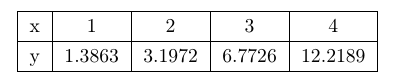

### 2. Побудуємо таблицю скінченних різниць



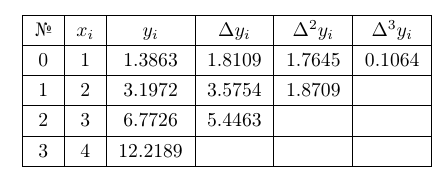

### 3. Запишемо інтерполяційний многочлен Лагранжа.

Інтерполяційний многочлен Лагранжа має вигляд:

$$L_n(x) = \sum \limits_{i=0}^{n} y_i \prod \limits_{j=0, j \neq i}^{n} \cfrac{x-x_i}{x_i - x_j}$$

У нашому випадку:

$L_3(x) = \sum \limits_{i=0}^{3} y_i \prod \limits_{j=0, j \neq i}^{3} \cfrac{x-x_i}{x_i - x_j} =
%
\cfrac{(x-x_1)(x-x_2)(x-x_3)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)} \cdot y_0 + 
%
\cfrac{(x-x_0)(x-x_2)(x-x_3)}{(x_1-x_0)(x_1-x_2)(x_1-x_3)} \cdot y_1 + 
%
\cfrac{(x-x_0)(x-x_1)(x-x_3)}{(x_2-x_0)(x_2-x_1)(x_2-x_3)} \cdot y_2 + 
%
\cfrac{(x-x_0)(x-x_1)(x-x_2)}{(x_3-x_0)(x_3-x_1)(x_3-x_2)} \cdot y_3 = 
%
%
\cfrac{(x-2)(x-3)(x-4)}{(1-2)(1-3)(1-4)} \cdot 1.3863 +
%
\cfrac{(x-1)(x-3)(x-4)}{(2-1)(2-3)(2-4)} \cdot 3.1972 + 
%
\cfrac{(x-1)(x-2)(x-4)}{(3-1)(3-2)(3-4)} \cdot 6.7726 +
%
\cfrac{(x-1)(x-2)(x-3)}{(4-1)(4-2)(4-3)} \cdot 12.2189 =
%
%
0.01773x^3 + 0.776 x^2 - 0.6408 x + 1.2335
$

Остаточно маємо:

$$ L_3(x) = 0.01773x^3 + 0.776 x^2 - 0.6408 x + 1.2335$$

### Запишемо перший поліном Ньютона.

У випадку $n=3$ він має вигляд:

$$P_{3}^1(x) = y_0 + \frac{\Delta y_0}{h} (x-x_0) + \frac{\Delta^2 y_0}{2!h^2} (x-x_0)(x-x_1) + \frac{\Delta^3 y_0}{3!h^3}(x - x_0)(x - x_1)(x - x_2)$$

Тоді:

$P_{3}^1 = 1.3863 + \frac{ 1.8109}{1}(x - 1) + \frac{1.7645}{2}(x-1)(x-2) +
\frac{0.1064}{6}(x-1)(x-2)(x-3) = 0.01773 x^3 + 0.776 x^2 - 0.6408 x + 1.2335$

### Запишемо другий поліном Ньютона.

У випадку $n=3$ він має вигляд:

$$P^2_3(x) = y_3 + \frac{\Delta y_2}{h}(x-x_3) + \frac{\Delta^2 y_1}{2!h^2}(x-x_3)(x-x_2) + \frac{\Delta^3 y_0}{3!h^3}(x-x_3)(x-x_2)(x-x_1) $$

Тоді:

$P^2_3(x) = 12.2189 + \frac{5.4463}{1}(x - 4) + \frac{1.8709}{2}(x-4)(x-3)
+ \frac{0.1064}{6}(x-4)(x-3)(x-2) = 0.01773 x^3 + 0.776 x^2 - 0.6408 x + 1.2335$

Отже, ми отримали: 

$$ L_3(x) = P_{3}^1(x) = P^2_3(x) = 0.01773 x^3 + 0.776 x^2 - 0.6408 x + 1.2335 $$ 

Це пояснюється тим, що   ми вибирали однакові вузли для всіх многочленів.

### 3. Використовуючи одержані поліноми обчислити значення функції в кількох невузлових точках (на вибір) та порівняти зі значенням функції в цих точках.

Візьмемо такі невузлові точки: 1.5, 2.5, 3.5

In [2]:
def f_(x):
    return 0.01773*(x**3) + 0.776*(x**2) - 0.6408*x + 1.2335
    
print("Знач. інт. поліному       знач. y(x)")
for i in [1.5, 2.5, 3.5]: 
    print(f"     {np.around(f_(i),5)}\t\t   {np.around(f(i), 5)}")

Знач. інт. поліному       знач. y(x)
     2.07814		   2.08258
     4.75853		   4.75553
     9.25687		   9.25815


### 4. Обрати три вузли з тих, які були використані в попередніх пунктах та побудувати за обраними вузлами інтерполяційний кубічний сплайн дефекту 1.

Виберемо такі вузли: $x_1 = 2, x_2 = 3, x_3 = 4$

У нашому випадку кубічний cплайн дефекту 1 має вигляд:

$$
g(x) =
\begin{aligned}
\begin{cases}
a_1 + b_1(x - 3) + c_1(x - 3)^2 + d_1(x - 3)^3, \quad &x \in [2;3] \\
a_2 + b_2(x - 4) + c_2(x - 4)^2 + d_2(x - 4)^3, \quad &x \in [3;4] \\
\end{cases}
\end{aligned}
$$

Позначимо:

$g_1(x) = a_1 + b_1(x - 3) + c_1(x - 3)^2 + d_1(x - 3)^3$

$g_2(x) = a_2 + b_2(x - 4) + c_2(x - 4)^2 + d_2(x - 4)^3$

складемо систему з 8-ма невідомими:

З умови інтерполяції у вузлі $x_1 = 2 \quad \left(g_1(2) = f(2)\right)$ маємо:

$$ a_1 - b_1 + c_1 -d_1 = 3.1972 \quad(1)$$

З умови інтерполяції у вузлі $x_2 = 3 \quad \left(g_1(3) = f(3) \quad \text{а також} \quad g_2(3) = f(3)\right)$ маємо:

$$ a_1 = 6.7726 \quad (2)$$

$$ a_2 - b_2 + c_2 - d_2 = 6.7726 \quad (3) $$

З умови інтерполяції у вузлі $x_3 = 4 \quad \left(g_2(4) = f(4)\right)$ маємо:

$$ a_2 = 12.2189 \quad (4) $$


$ $

Оскільки  $g''(2) = g''(4) =0$, маємо:

$$ 2c_1 + 6 d_1 (2-3) = 2c_1 - 6 d_1 = 0 \quad (5) $$

$$ 2c_2 + 6 d_2 (4-4) = 2c_2 = 0 \quad (6) $$

$ $

Функції $g_1(x)$ та $g_2(x)$, а також їхні похідні першого та другого порядків у точці $x = 3$ мають однакові значення, тому маємо ще три рівняння:

$$ a_1 =  a_2 - b_2 + c_2 - d_2 \quad (7)$$

$$ b_1 = b_2 - 2c_2 + 3 d_2 \quad (8)$$

$$ 2c_1 = 2c_2 - 6d_2 \quad (9)$$


сьоме рівняння випливає з другого та третього, тому його в систему не записуємо. Тоді маємо:

$$
\begin{aligned}
\begin{cases}
&a_1 - b_1 + c_1 -d_1 = 3.1972 \\
&a_1 = 6.7726 \\
&a_2 - b_2 + c_2 - d_2 = 6.7726 \\
&a_2 = 12.2189 \\
&2c_1 - 6 d_1 = 0 \\
&c_2 = 0 \\
&-b_1 + b_2 - 2c_2 + 3 d_2 = 0 \\
&-2c_1 + 2c_2 - 6d_2  = 0
\end{cases}
\end{aligned}
$$

розв'яжемо систему за допомогою бібліотеки numpy

In [3]:
A = np.array([[1, -1, 1, -1, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 0, 1, -1, 1, -1],
              [0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 2, -6, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0],
              [0, -1, 0, 0, 0, 1, -2, 3],
              [0, 0, -2, 0, 0, 0,2,-6]])

b = np.array([[3.1972],
              [6.7726],
              [6.7726],
              [12.2189],
              [0],
              [0],
              [0],
              [0]])

np.around(np.linalg.solve(A,b), 4)

array([[ 6.7726],
       [ 4.5108],
       [ 1.4032],
       [ 0.4677],
       [12.2189],
       [ 5.914 ],
       [ 0.    ],
       [-0.4677]])

Отже, отримали:

$$
g(x) =
\begin{aligned}
\begin{cases}
6.7726 + 4.5108(x - 3) + 1.4032(x - 3)^2 + 0.4677(x - 3)^3, \quad &x \in [2;3] \\
12.2189 + 5.914 (x - 4) -0.4677(x - 4)^3, \quad &x \in [3;4] \\
\end{cases}
\end{aligned}
$$

### 5. Побудувати графіки отриманих поліномів та графік функції $f(x)$

Нище подані графіки. Графік функції $f(x)$ - зелений. Графік поліномів - фіолетовий. Графік кубічного сплайну дефекту 1: на відрізку [2;3] зображений червоним, а на [3;4] - синім.

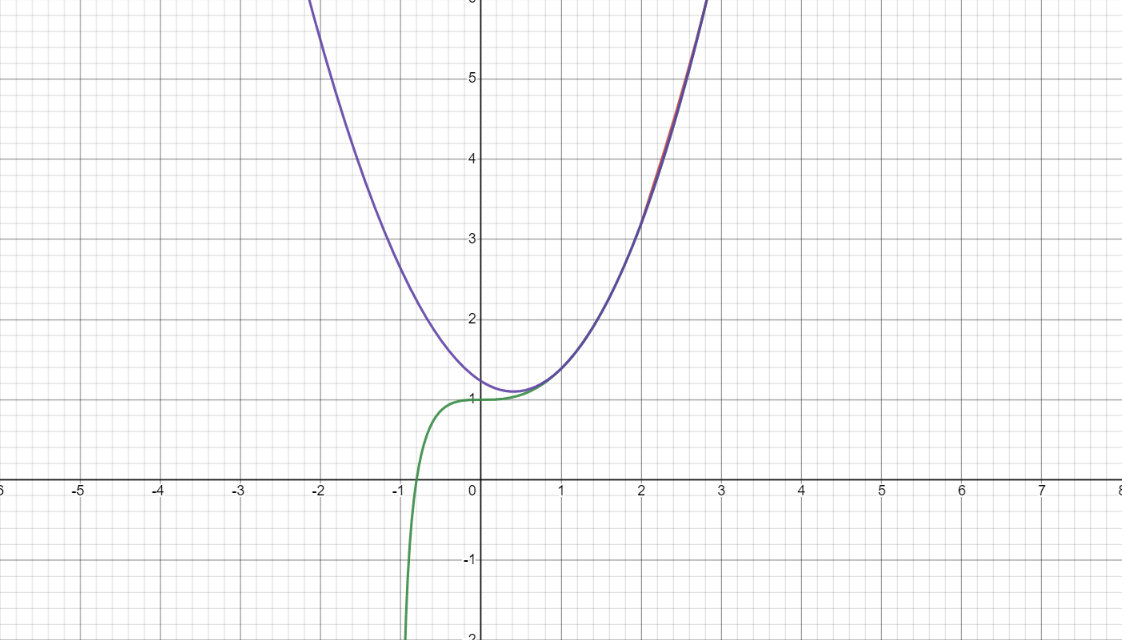

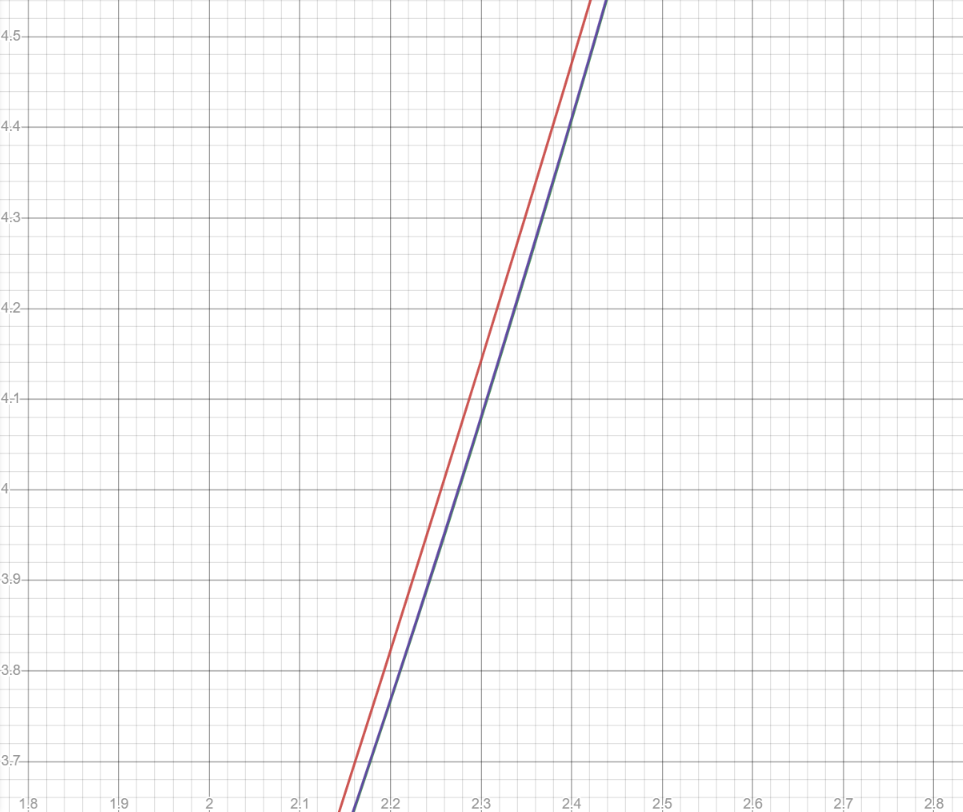

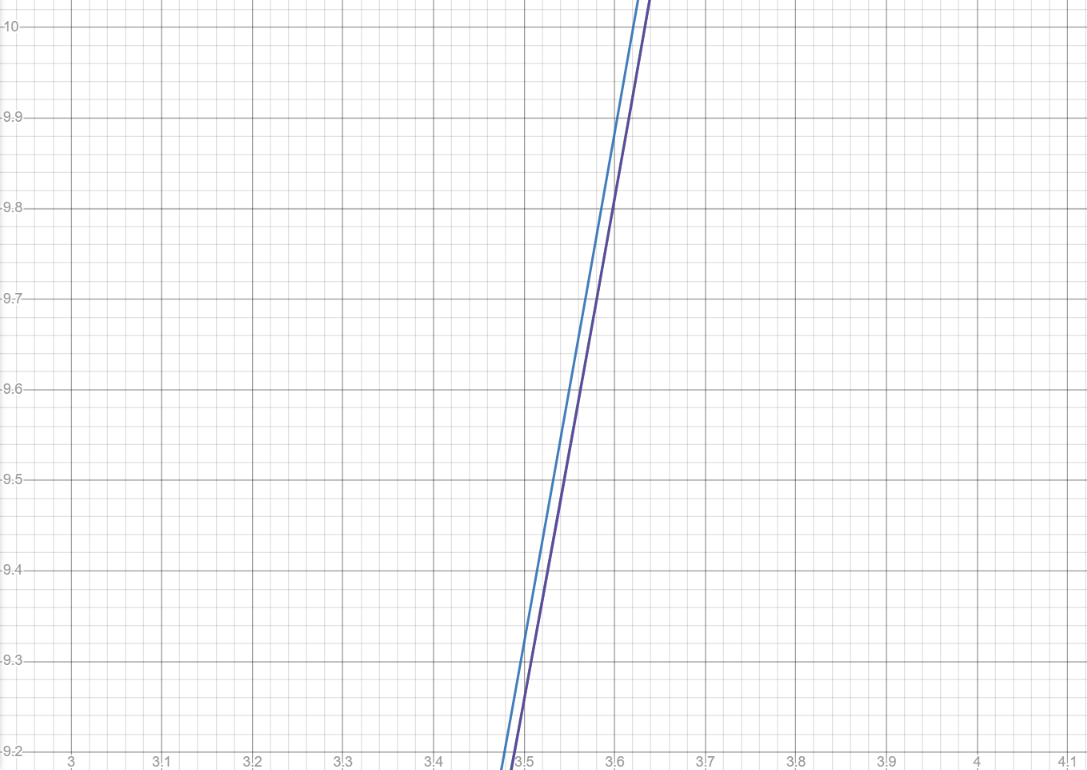

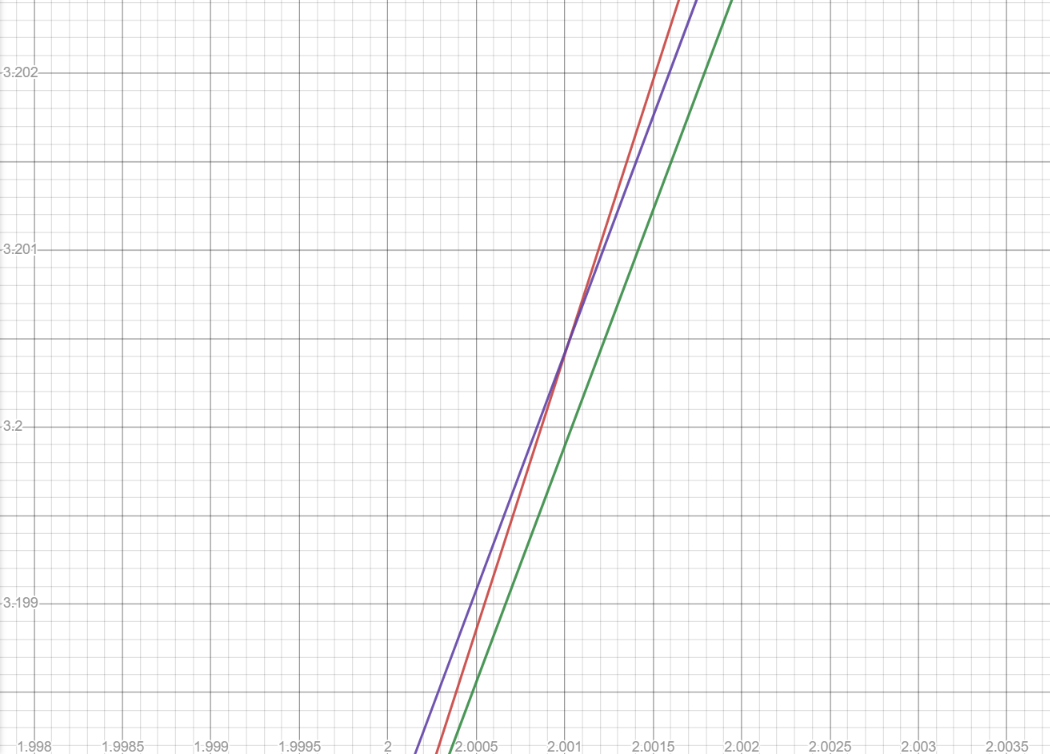

### 6. Зробити висновок, проаналізувавши отримані графіки.

Графік поліномів, графік кубічного сплайну дефекту 1, а також графік самої функції $f(x)$ проходять досить близько, тому можна стверджувати, що завдання знаходження інтерполяційної кривої на вибраному відрізку - виконано.

## Завдання 2.

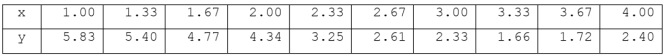

### 1. Нанести точки, задані в таблиці на графік.

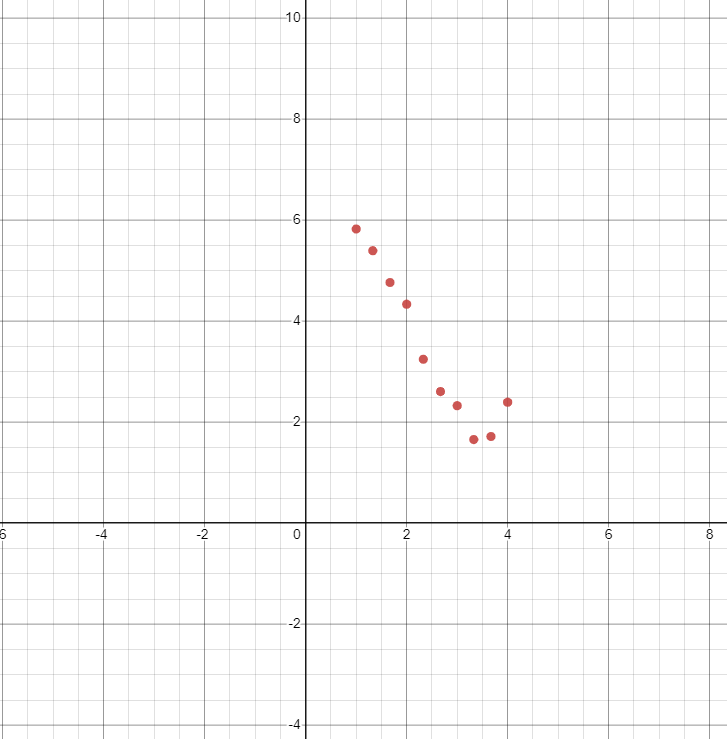

### 2. Обрати клас апроксимуючої функції.

Оскільки точки на графіку нагадують пряму, то виберемо функцію вигляду: $ f(x) = ax + b $


 ### 3. Обчислити  параметри.
 
Будемо знаходити $a$ і $b$ виходячи з наступної умови:
 
$$ \sum \limits_{i=0}^{10}(a x_i + b - y_i)^2 \to min$$ 

Отримуємо систему:

$$
\begin{cases}
2 \sum \limits_{i=1}^{10} (ax_i + b - y_i)\cdot \left. \frac{\partial f}{\partial a} \right|_{x=x_i} = 0 \\
2 \sum \limits_{i=1}^{10} (ax_i + b - y_i)\cdot \left. \frac{\partial f}{\partial b} \right|_{x=x_i} = 0
\end{cases}
\quad \Rightarrow{} \quad
\begin{cases}
\sum \limits_{i=1}^{10} (ax_i + b - y_i) \cdot x_i = 0 \\
\sum \limits_{i=1}^{10} (ax_i + b - y_i) = 0\\
\end{cases}
\quad \Rightarrow{} \quad 
\begin{cases}
a \sum \limits_{i=1}^{10} x_i^2 + b \sum \limits_{i=1}^{10} x_i - \sum \limits_{i=1}^{10} x_i y_i = 0 \\
a \sum \limits_{i=1}^{10} x_i + 10b - \sum \limits_{i=1}^{10} y_i = 0 
\end{cases}
$$

In [4]:
x = [1, 1.33, 1.67, 2, 2.33, 2.67, 3, 3.33, 3.67, 4]
y = [5.83, 5.4, 4.77, 4.34, 3.25, 2.61, 2.33, 1.66, 1.72, 2.4]

sum_x = 0
sum_y = 0
sum_xx = 0
sum_xy = 0

for i in range(10):
    sum_x = sum_x + x[i]
    sum_xx = sum_xx + (x[i])**2
    sum_xy = sum_xy + x[i]*y[i]
    sum_y = sum_y + y[i]
    
print("sum_x = ", sum_x)
print("sum_xx = ", sum_xx)
print("sum_xy = ", sum_xy)
print("sum_y = ", sum_y)

sum_x =  25.0
sum_xx =  71.6734
sum_xy =  72.62929999999999
sum_y =  34.31


Отже, отримали таку систему:

$$
\begin{cases}
71.6734 \cdot a + 25 b = 72.6293 \\
25 a + 10 b = 34.31
\end{cases}
$$

Розв'яжемо її:

In [5]:
A = np.array([[71.6734, 25],
              [25, 10]])

b = np.array([[72.6293],
              [34.31]])

np.around(np.linalg.solve(A, b),4)

array([[-1.433 ],
       [ 7.0136]])

Отже, маємо: $f(x) = -1.433 x + 7.0136$ 

### 4. Побудувати на одному графіку точки, задані в таблиці та графік отриманої функції

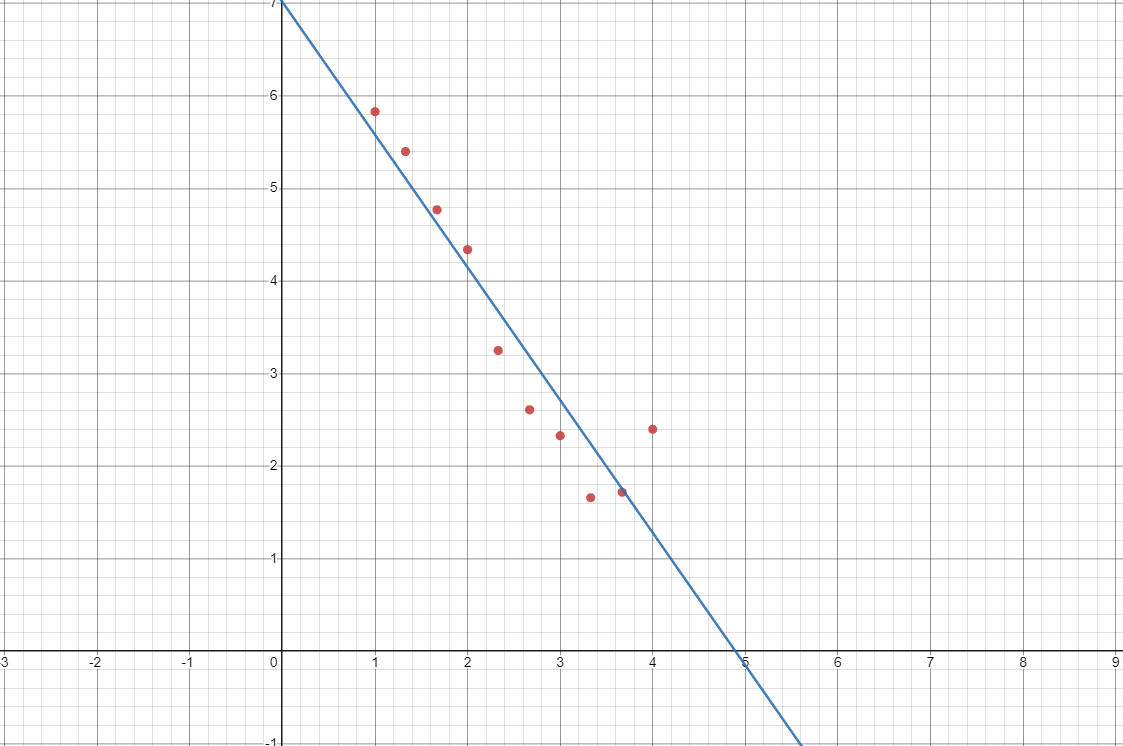

### Висновок.
У ході данної лабораторної роботи я навчився будувати інтерполяційні поліноми для заданих функцій, а також будувати функцію, яка апроксимує на заданому відрізку задану сіткову функцію. 